#Customer Segmentation & Sales Analysis - Supermarket Dataset

**Dataset:** [Supermarket Sales](https://www.kaggle.com/datasets/faresashraf1001/supermarket-sales/data)

**Tujuan Proyek:**
- Memahami karakteristik pelanggan berdasarkan perilaku belanja mereka
- Menganalisis perbedaan penjualan berdasarkan gender dan segmentasi lainnya
- Melakukan customer segmentation dengan K-Means clustering
- Memberikan insight actionable untuk strategi pemasaran dan loyalitas pelanggan

**Tools:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn


### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
url = '/content/SuperMarket Analysis.csv'
df = pd.read_csv(url)

In [3]:
# Buat kolom 'Total'
df['Total'] = df['Unit price'] * df['Quantity']

### Tinjauan Awal Dataset

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,307.58738
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,234.17651
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,10.17000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,118.49750
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,241.76000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,448.90500
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,993.00000


### Cek Data Kosong

In [5]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


### Eksplorasi Data

**Distribusi kategori produk**

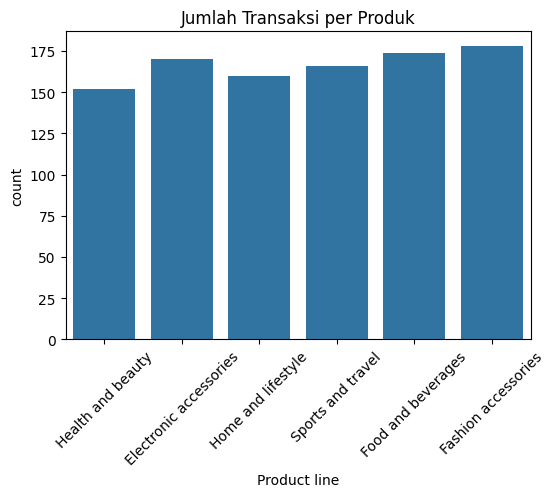

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product line')
plt.title('Jumlah Transaksi per Produk')
plt.xticks(rotation=45)
plt.show()

Insight: Produk dengan jumlah transaksi tertinggi adalah Fashion accessories, disusul oleh Food and beverages. Hal ini menunjukkan preferensi pelanggan terhadap produk yang mungkin bersifat impulsif atau berharga terjangkau. Produk seperti Health and beauty memiliki volume transaksi lebih rendah, yang bisa berarti lebih niche atau segmented market.

**Penjualan per Kota**

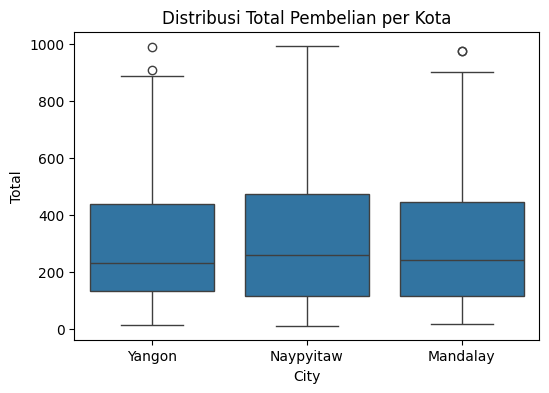

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='City', y='Total')
plt.title('Distribusi Total Pembelian per Kota')
plt.show()

**Trend Penjualan Berdasarkan Tanggal**

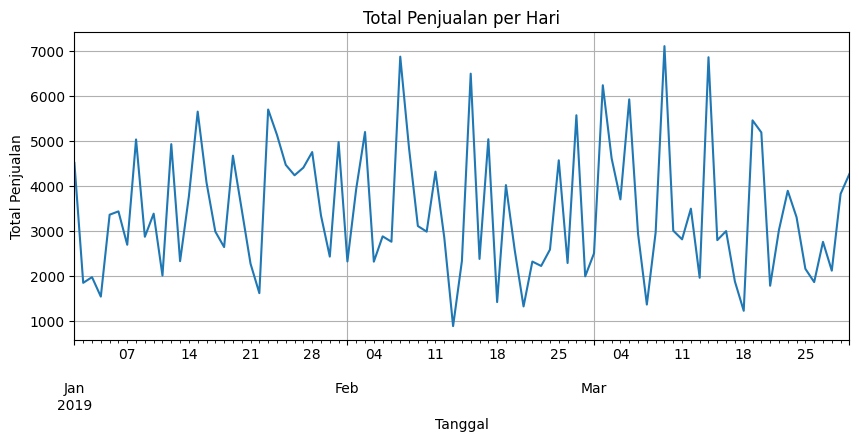

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total'].sum()

plt.figure(figsize=(10,4))
daily_sales.plot()
plt.title('Total Penjualan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

### Visualisasi Tambahan 1: Total Penjualan Berdasarkan Gender

In [15]:
# Statistik deskriptif per gender
print(df.groupby('Gender')['Total'].agg(['mean', 'std', 'count']))

              mean         std  count
Gender                               
Female  324.696585  239.631753    571
Male    284.814988  224.975890    429


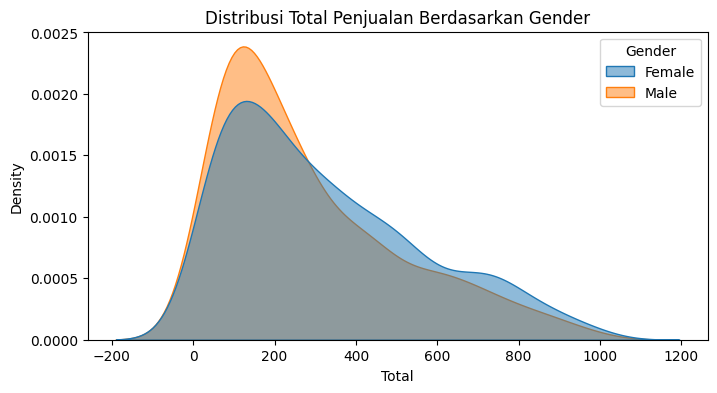

In [16]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='Total', hue='Gender', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribusi Total Penjualan Berdasarkan Gender')
plt.xlabel('Total')
plt.ylabel('Density')
plt.show()


 Uji statistik (independent t-test) untuk mengetahui apakah rata-rata nilai pembelian pelanggan laki-laki dan perempuan berbeda secara signifikan.

In [11]:
from scipy.stats import ttest_ind

# Ambil nilai total berdasarkan gender
male_total = df[df['Gender'] == 'Male']['Total']
female_total = df[df['Gender'] == 'Female']['Total']

# Uji t dua sampel (tidak diasumsikan variansi sama)
t_stat, p_value = ttest_ind(female_total, male_total, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


T-Statistic: 2.6977
P-Value: 0.0071


Insight: Berdasarkan uji t dua sampel independen, ditemukan bahwa pelanggan perempuan memiliki rata-rata nilai pembelian yang secara signifikan lebih tinggi daripada pelanggan laki-laki (p = 0.0071).

Hal ini memperkuat temuan dari total penjualan, dan mengindikasikan bahwa pelanggan perempuan tidak hanya lebih banyak belanja, tapi juga cenderung melakukan transaksi dengan nominal lebih besar.

Perusahaan dapat mempertimbangkan pendekatan pemasaran yang lebih terpersonalisasi untuk segmen pelanggan perempuan - seperti paket bundling yang sesuai dengan preferensi mereka, atau promosi berbasis kategori produk yang lebih sering mereka beli.

### Clustering:

Mengelompokkan pelanggan berdasarkan pola belanja pelanggan agar bisnis dapat:

    Menyesuaikan strategi pemasaran ke tiap segmen.

    Mengetahui siapa pelanggan "besar" vs "hemat".

    Mengoptimalkan penawaran dan promo.

**K-Means**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pilih fitur yang relevan
features = df[['Unit price', 'Quantity', 'Total', 'Rating']]

# 2. Standarisasi fitur agar clustering tidak bias
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


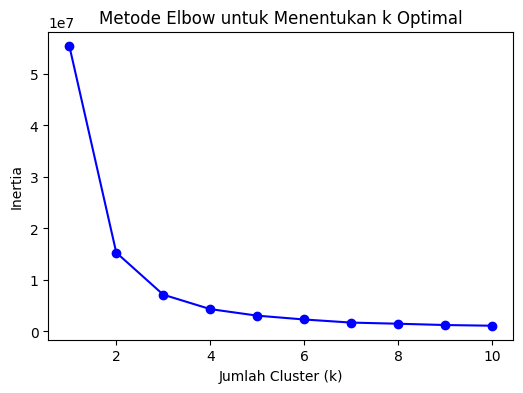

In [13]:
X = df[['Unit price', 'Quantity','Total','Rating']]
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


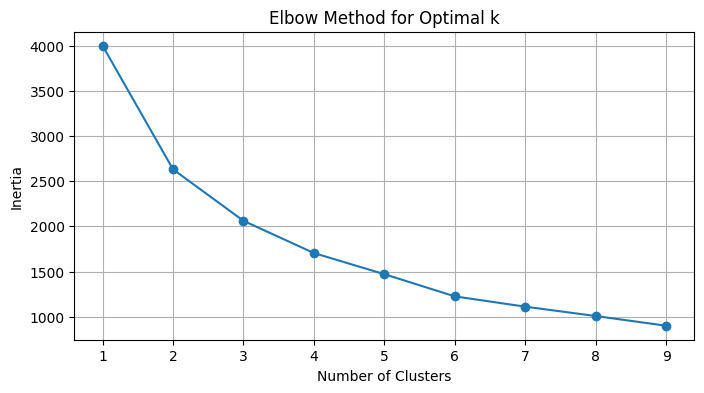

In [14]:
# 3. Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


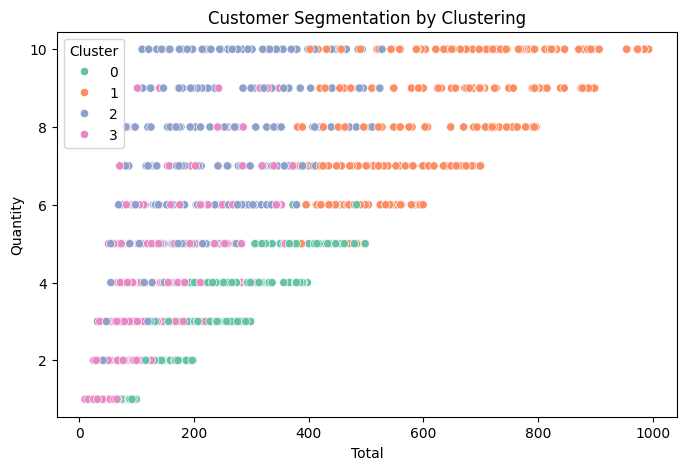

In [17]:
# Pilih 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi hasil clustering
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total', y='Quantity', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation by Clustering')
plt.show()


In [18]:
# Rata-rata tiap fitur per cluster
cluster_summary = df.groupby('Cluster')[['Unit price', 'Quantity', 'Total', 'Rating']].mean().round(2)
cluster_summary


,Unit price,Quantity,Total,Rating
Cluster,,,,
0,77.17,2.89,222.41,7.66
1,78.39,8.17,634.78,6.53
2,32.57,7.10,231.47,8.16
3,36.78,3.57,126.83,5.70


In [19]:
cluster_labels = {
    0: "Selective Spenders",
    1: "High Rollers (Big Spenders)",
    2: "Value Seekers – Loyal & Produktif",
    3: "Casual, Unengaged Buyers"
}
df['Segment'] = df['Cluster'].map(cluster_labels)


In [20]:
df['Segment']

,Segment
0,High Rollers (Big Spenders)
1,Value Seekers – Loyal & Produktif
2,Value Seekers – Loyal & Produktif
3,Value Seekers – Loyal & Produktif
4,High Rollers (Big Spenders)
...,...
995,"Casual, Unengaged Buyers"
996,High Rollers (Big Spenders)
997,"Casual, Unengaged Buyers"
998,"Casual, Unengaged Buyers"


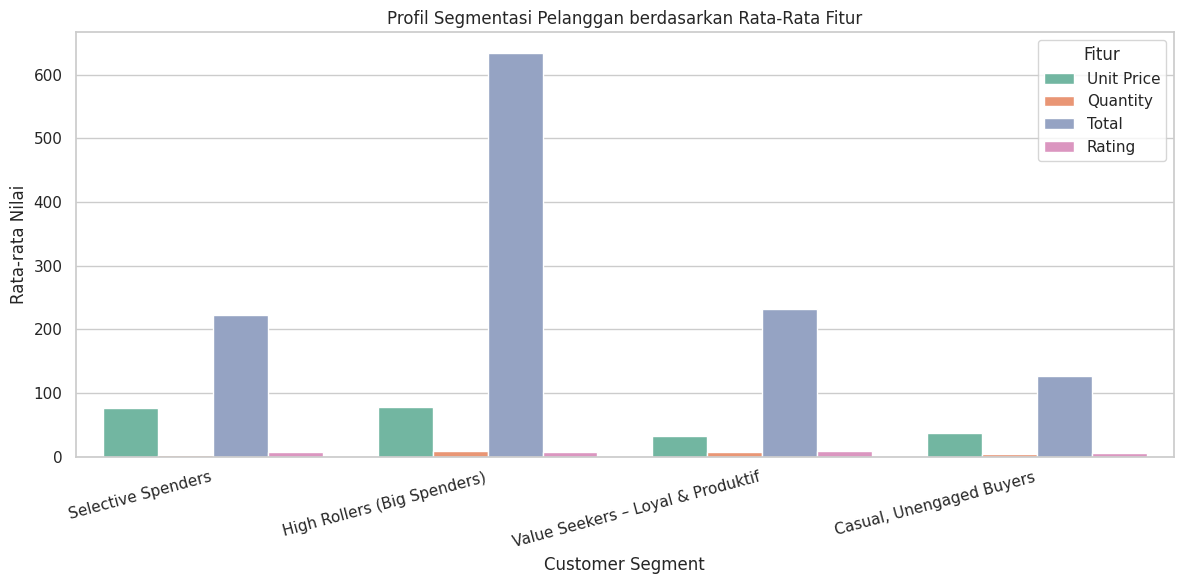

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cluster summary
cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Segment': [
        'Selective Spenders',
        'High Rollers (Big Spenders)',
        'Value Seekers – Loyal & Produktif',
        'Casual, Unengaged Buyers'
    ],
    'Unit Price': [77.17, 78.39, 32.57, 36.78],
    'Quantity': [2.89, 8.17, 7.10, 3.57],
    'Total': [222.41, 634.78, 231.47, 126.83],
    'Rating': [7.66, 6.53, 8.16, 5.70]
})

# Set style for better visuals
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Melt for grouped bar plot
melted = cluster_summary.melt(id_vars=['Cluster', 'Segment'], value_vars=['Unit Price', 'Quantity', 'Total', 'Rating'],
                              var_name='Feature', value_name='Value')

# Barplot grouped by segment and feature
sns.barplot(data=melted, x='Segment', y='Value', hue='Feature', palette='Set2')
plt.xticks(rotation=15, ha='right')
plt.title('Profil Segmentasi Pelanggan berdasarkan Rata-Rata Fitur')
plt.xlabel('Customer Segment')
plt.ylabel('Rata-rata Nilai')
plt.tight_layout()
plt.legend(title='Fitur')
plt.show()


In [22]:
# Tambahkan deskripsi statistik per cluster
cluster_stats = df.groupby('Cluster')[['Unit price', 'Quantity', 'Total', 'Rating']].agg(['mean', 'std'])
display(cluster_stats)

Unit price             Quantity                 Total              \
              mean        std      mean       std        mean         std   
Cluster                                                                     
0        77.171696  15.752525  2.888393  1.417713  222.412098  117.459021   
1        78.389008  14.724432  8.167939  1.519491  634.782328  153.524954   
2        32.568566  14.018974  7.103586  2.228279  231.467171  120.626967   
3        36.779620  16.761893  3.574144  2.168744  126.828289   91.555838   

           Rating            
             mean       std  
Cluster                      
0        7.660268  1.463665  
1        6.531298  1.697760  
2        8.156972  1.297066  
3        5.696578  1.176531

Dari hasil segmentasi pelanggan menggunakan K-Means clustering, ditemukan empat segmen utama:

    High Rollers (Big Spenders): Pelanggan membeli produk mahal dalam jumlah besar, memberikan kontribusi terbesar ke penjualan, tapi memiliki rating lebih rendah - kemungkinan karena ekspektasi tinggi atau pengalaman belanja yang belum optimal.

    Value Seekers - Loyal & Produktif: Pelanggan hemat yang puas. Pelanggan membeli banyak produk harga menengah ke bawah dan menunjukkan tingkat kepuasan tertinggi. Sangat cocok dijadikan target loyalitas dan promosi diskon.

    Selective Spenders: Pembeli dengan preferensi produk mahal, tapi jumlah belanjanya sedikit. Pelanggan cukup puas, dan bisa ditingkatkan engagement-nya lewat promosi eksklusif.

    Casual, Unengaged Buyers: Belanja sedikit dan tidak puas. Ini adalah kelompok berisiko churn, dan perlu pendekatan retensi yang lebih aktif.